**To convert the basic semantic search engine into an advanced one, we can implement several improvements and features such as:**

**Indexing for Faster Searches**: Use an efficient indexing structure like FAISS for fast nearest neighbor search.

**Preprocessing Text**: Implement text preprocessing (e.g., tokenization, stemming, removing stop words) to improve the quality of embeddings.

**User Interface**: Add a user-friendly interface, possibly using a web framework like Flask or FastAPI.

***Handling Large Datasets***: Implement methods to handle and search through large datasets.

**Improved** **Ranking**: Combine semantic similarity with other ranking factors like document popularity or recency.

Faiss Steps :
**raw text > into Embeddings [using an encoder] > save it in FAISS > raw text query > into an Embedding > Euclidean distance to retrieve the text closest to the query**

#Download the needed Library , Import them

In [1]:
!pip install datasets faiss-gpu sentence_transformers gradio rank_bm25 openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [2]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 97.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=664691d64f1722472fd5e3cc5484559a84537b781a5e16d4d4e4f87ff15bccc1
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
pip install eda


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [99]:
from datasets import load_dataset
import gradio as gr
import pandas as pd
import numpy as np
import faiss
from transformers import AutoTokenizer, AutoModel
from sentence_transformers import SentenceTransformer
from rank_bm25 import BM25Okapi
import nltk
from nltk.tokenize import word_tokenize
import openai
import torch
import re
from ydata_profiling import ProfileReport
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests
from tqdm import tqdm
import pickle
from transformers import BartTokenizer, BartForConditionalGeneration


#Load the data & Analyses the data




In [5]:
from random import shuffle

ds = load_dataset("traversaal-ai-hackathon/hotel_datasets")

df = ds['train'].to_pandas()

csv_path = 'hotel_datasets.csv'
df.to_csv(csv_path, index=False )

print(f"The dataset has been saved to {csv_path}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/5997 [00:00<?, ? examples/s]

The dataset has been saved to hotel_datasets.csv


In [6]:
df_copy = df.copy()

In [7]:

# # Generate a profile report
# profile = ProfileReport(df, title="Hotel Dataset Analysis", explorative=True)

# # To display the report in a Jupyter Notebook (if you're using one)
# profile.to_notebook_iframe()

# # To save the report as an HTML file
# profile.to_file("hotel_dataset_analysis_report.html")


In [8]:

# # Generate a report
# eda.analysis(df)


# preprocess the images & embade images --> genrate caption ---> store it in list ---. combined in df

In [72]:
df_copy_shuffled = df_copy.sample(frac=1).reset_index(drop=True)

df_copy_first_1000 = df_copy_shuffled.head(1000)



In [73]:
df_copy_first_1000.hotel_name.value_counts()

,count
hotel_name,
Hotel Zephyr San Francisco,13
Hotel Edison,13
"The Clermont London, Charing Cross",13
Ameritania At Times Square,11
"The New Yorker, A Wyndham Hotel",11
...,...
Park Grand Paddington Court,3
Strand Palace,3
The Resident Covent Garden,3


In [12]:
df_copy_first_1000.head()

,hotel_name,hotel_description,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,rating_value,review_count,street_address,locality,country
0,Pell Palace Hotel Spa,Our Hotel is located in the historical center ...,Above and beyond,I have stayed here for 6 night with my parents...,5.0,April 2023,https://www.tripadvisor.com/Hotel_Review-g2939...,https://dynamic-media-cdn.tripadvisor.com/medi...,$ (Based on Average Nightly Rates for a Standa...,4.5,123,Emin Sinan Mah. Gedikpaşa Cami Sk. No:37,Istanbul,Türkiye
1,Hyatt Place San Francisco Downtown,The Hyatt Place San Francisco Downtown is a LE...,Excellent hotel!,None,NaN,February 2020,https://www.tripadvisor.com/Hotel_Review-g6071...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,4.0,534,701 3rd St,San Francisco,United States
2,Cheers Lighthouse,"Introducing Cheers Lighthouse, the outcast of ...",Such a Great Time,It was a really great time. The hostel has the...,5.0,August 2023,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,692,Kucuk Ayasofya Mah. Cayiroglu Sok. No:18 Sulta...,Istanbul,Turkiye
3,Travelodge London Central City Road,None,Worst accommodation experience I ever had,I went with my girlfriend and had the worst ex...,1.0,December 2023,https://www.tripadvisor.com/Hotel_Review-g1863...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,4.0,3056,1-23 City Road,London,United Kingdom
4,Moxy NYC East Village,"Designed for the modern traveler, our lifestyl...",Absolutely loved it,Not only was the room wonderful and welcoming ...,5.0,December 2023,https://www.tripadvisor.com/Hotel_Review-g6076...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,5.0,1188,112 East 11th Street,New York City,United States


Processing images:  25%|██▌       | 253/1000 [00:05<00:19, 38.32image/s]

Error processing https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg: 403 Client Error: Forbidden for url: https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg


Processing images:  40%|███▉      | 398/1000 [00:07<00:12, 47.97image/s]

Error processing https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg: 403 Client Error: Forbidden for url: https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg


Processing images:  49%|████▉     | 488/1000 [00:09<00:12, 42.38image/s]

Error processing https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg: 403 Client Error: Forbidden for url: https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg


Processing images:  60%|██████    | 605/1000 [00:12<00:06, 58.31image/s]

Error processing https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg: 403 Client Error: Forbidden for url: https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg


Processing images:  62%|██████▏   | 624/1000 [00:12<00:06, 54.21image/s]

Error processing https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg: 403 Client Error: Forbidden for url: https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg


Processing images:  66%|██████▌   | 656/1000 [00:12<00:05, 57.88image/s]

Error processing https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg: 403 Client Error: Forbidden for url: https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg


Processing images:  69%|██████▉   | 693/1000 [00:13<00:05, 57.89image/s]

Error processing https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg: 403 Client Error: Forbidden for url: https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg


Processing images: 100%|██████████| 1000/1000 [00:19<00:00, 51.95image/s]


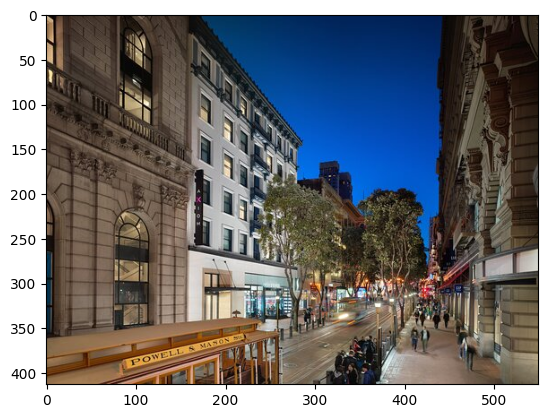

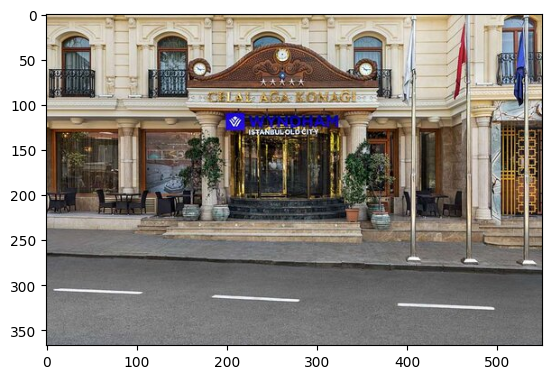

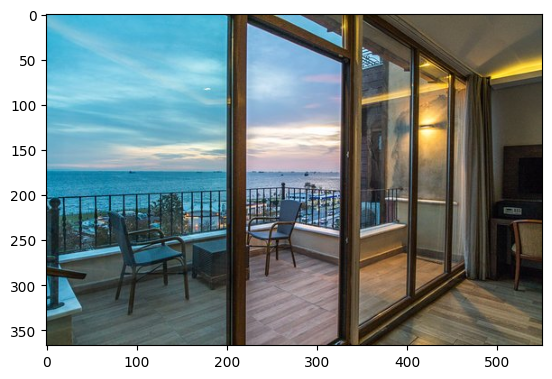

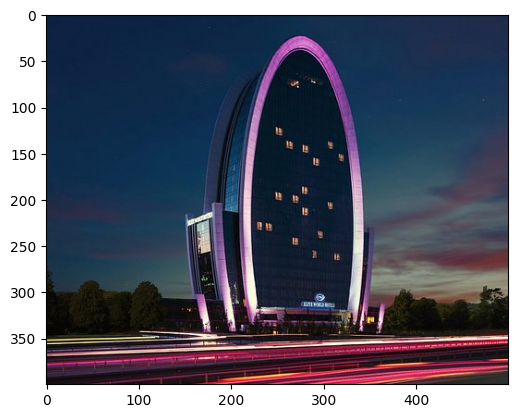

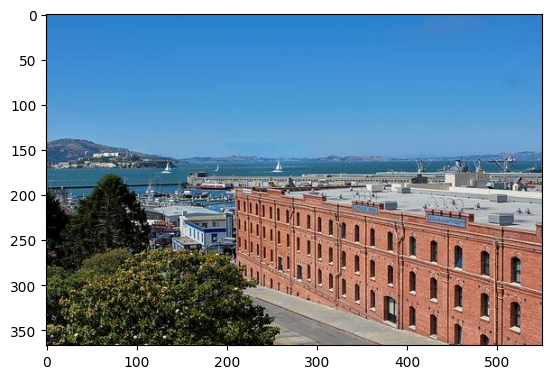

In [74]:


# Initialize an empty list to store processed images
processed_images = []

# Extract the image URLs from the DataFrame
image_urls = df_copy_first_1000['hotel_image']

# Loop through URLs with tqdm to show progress
for url in tqdm(image_urls, desc="Processing images", unit="image"):
    try:
        # Load the image from the URL
        response = requests.get(url, stream=True, timeout=5)
        response.raise_for_status()  # Raise an exception for HTTP errors
        image = Image.open(response.raw)

        # Convert image to numpy array for further processing
        image_np = np.asarray(image)

        # Perform any additional preprocessing here (e.g., resizing, normalization)
        # Example: image_np = np.resize(image_np, (224, 224, 3))  # Resizing to 224x224

        # Append the preprocessed image to the list
        processed_images.append(image_np)

    except Exception as e:
        # If an image fails to load, skip it
        print(f"Error processing {url}: {e}")
        continue

# Optionally, display the first few processed images to confirm
for image in processed_images[:5]:  # Display the first 5 processed images
    plt.imshow(image)
    plt.show()


Model to give us images caption

In [75]:
from transformers import BlipProcessor, BlipForConditionalGeneration

# Initialize the image captioning model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


In [76]:
import torch
from tqdm import tqdm
from PIL import Image

# Ensure you have a GPU available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to GPU
model.to(device)

# List to store captions
captions = []

# Loop through processed images and generate captions
for image_np in tqdm(processed_images, desc="Generating captions", unit="image"):
    try:
        # Convert numpy array back to PIL Image
        image = Image.fromarray(image_np)

        # Preprocess the image
        inputs = processor(images=image, return_tensors="pt").to(device)  # Move inputs to GPU

        # Generate the caption
        outputs = model.generate(**inputs)
        caption = processor.decode(outputs[0], skip_special_tokens=True)

        # Append the caption to the list
        captions.append(caption)

    except Exception as e:
        # If there's an error, append a placeholder caption
        captions.append("No caption available")
        print(f"Error generating caption: {e}")


Generating captions:   0%|          | 0/993 [00:00<?, ?image/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Generating captions: 100%|██████████| 993/993 [04:25<00:00,  3.74image/s]


In [77]:


# Handle length mismatch before assigning to DataFrame
if len(captions) < len(df_copy_first_1000):
    # Pad the captions list with placeholder values
    captions += ["No caption available"] * (len(df_copy_first_1000) - len(captions))

# Now assign the captions to the DataFrame
df_copy_first_1000['captions'] = captions

# ... (rest of the code)

<ipython-input-77-e874f718199f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_first_1000['captions'] = captions


In [78]:
df_copy_first_1000['captions'].head(2)

,captions
0,a street with a sidewalk and a building
1,"hotel royal, budapest"


Combined the important features with captions with cleaning

In [79]:
# Combine the specified columns into one column
df_copy_first_1000['combined'] = (
    df_copy_first_1000['captions'].fillna('') + " " +
    df_copy_first_1000['hotel_description'].fillna('') + " " +
    df_copy_first_1000['review_title'].fillna('') + " " +
    df_copy_first_1000['review_text'].fillna('') + " " +
    df_copy_first_1000['rate'].fillna('').astype(str) + " " +
    df_copy_first_1000['price_range'].fillna('') + " " +
    df_copy_first_1000['review_count'].fillna('').astype(str) + " " +
    df_copy_first_1000['locality'].fillna('')
)


<ipython-input-79-bcb74aac7034>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_first_1000['combined'] = (


In [80]:
# Display the first few rows of the combined column
df_copy_first_1000['combined'][1]


"hotel royal, budapest Wyndham Istanbul Oldcity is a 138-room hotel located in the heart of Istanbul, within walking distance of many of the city's most popular attractions, including the Grand Bazaar, Hagia Sophia, and Blue Mosque. The hotel offers a variety of luxury guest rooms and suites, all of which feature modern amenities and stylish décor. Some of the hotel's facilities and amenities include: A rooftop terrace with stunning views of the city An indoor pool and fitness center A spa and wellness center A business center A variety of restaurants and bars 24-hour room service The hotel also offers a variety of services and amenities to make your stay more enjoyable, such as: Complimentary Wi-Fi Daily housekeeping Laundry and dry cleaning services Airport shuttle Tour desk Wyndham Istanbul Oldcity is the perfect place to stay for your next trip to Istanbul. With its convenient location, luxurious accommodations, and excellent amenities, you're sure to have a memorable stay. One of 

# embade  comined column using (paraphrase-MiniLM-L6-v2) model

In [81]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [82]:
# emnbde the combined column
embeddings = model.encode(df_copy_first_1000['combined'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [83]:
# Save the embeddings in file
with open('embeddings.pkl', 'wb') as file:
    pickle.dump(embeddings, file)

In [84]:
# check the saved file
with open('embeddings.pkl', 'rb') as file:
    embeddings = pickle.load(file)

#normlization and FAISS


In [98]:
# Assuming 'embeddings' is your numpy array of embeddings
from sklearn.preprocessing import normalize
normalized_embeddings = normalize(embeddings, norm='l2')
with open('normalized_embeddings.pkl', 'wb') as f:
    pickle.dump(normalized_embeddings, f)

In [86]:
# Determine the dimension of the embeddings
dimension = normalized_embeddings.shape[1]

# Create a FAISS index for L2 distance
index = faiss.IndexFlatL2(dimension)

# Add normalized embeddings to the index
index.add(normalized_embeddings)

In [87]:
# Example: Search for hotels similar to a specific embedding
query_embedding = normalized_embeddings[0].reshape(1, -1)  # Example query

# Search for the top k similar hotels
k = 10  # Number of results you want
distances, indices = index.search(query_embedding, k)

In [88]:
# Retrieve the top k similar hotels
top_hotels = df_copy_first_1000.iloc[indices[0]]

# Display the results
print(top_hotels[['hotel_name', 'combined']])  # Adjust columns based on what you want to display


      hotel_name                                           combined
149  Axiom Hotel  a street with a sidewalk and a building Whatev...
0    Axiom Hotel  a street with a sidewalk and a building Whatev...
207  Axiom Hotel  a street with a sidewalk and a building Whatev...
826  Axiom Hotel  the exterior of the building at the corner of ...
725  Axiom Hotel  a large room with a lot of furniture Whatever ...
253  Axiom Hotel  a rooftop with tables and chairs and lights Wh...
592  Axiom Hotel  a hotel room with a bed and a television Whate...
680  Axiom Hotel  the hotel at night Whatever your reason for tr...
974  Axiom Hotel  a room with a desk, chair and bookcase Whateve...
407  Axiom Hotel  a bedroom with a bed, chair, desk and a tv Wha...


#TEST

In [89]:
query_text = "luxury hotel with pool in londonn"
query_embedding = model.encode(query_text, convert_to_tensor=True)
query_embedding = query_embedding.cpu().numpy().reshape(1, -1)
query_embedding = normalize(query_embedding, norm='l2')

# Step 2: Search using FAISS
k = 10
distances, indices = index.search(query_embedding, k)

# Step 3: Retrieve and display results
top_hotels = df_copy_first_1000.iloc[indices[0]]
top_hotels[['hotel_name', 'locality', 'price_range', 'rate']]


,hotel_name,locality,price_range,rate
209,Novotel London Blackfriars,London,$$ (Based on Average Nightly Rates for a Stand...,4.0
34,Novotel London Blackfriars,London,$$ (Based on Average Nightly Rates for a Stand...,5.0
957,Strand Palace,London,$$ (Based on Average Nightly Rates for a Stand...,5.0
608,Novotel London Blackfriars,London,$$ (Based on Average Nightly Rates for a Stand...,5.0
874,The Royal Horseguards,London,$$ (Based on Average Nightly Rates for a Stand...,4.0
590,Canopy by Hilton London City,London,$$ (Based on Average Nightly Rates for a Stand...,3.0
449,Strand Palace,London,$$ (Based on Average Nightly Rates for a Stand...,5.0
970,The Tower Hotel,London,$ (Based on Average Nightly Rates for a Standa...,1.0
336,The Royal Horseguards,London,$$ (Based on Average Nightly Rates for a Stand...,4.0
713,The FIDI Hotel,New York City,$ (Based on Average Nightly Rates for a Standa...,5.0


In [90]:
top_hotels.columns

Index(['hotel_name', 'hotel_description', 'review_title', 'review_text',
       'rate', 'tripdate', 'hotel_url', 'hotel_image', 'price_range',
       'rating_value', 'review_count', 'street_address', 'locality', 'country',
       'captions', 'combined'],
      dtype='object')

In [91]:
df_copy_first_1000

,hotel_name,hotel_description,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,rating_value,review_count,street_address,locality,country,captions,combined
0,Axiom Hotel,"Whatever your reason for travel, you’ll find A...",Key in Axiom,None,NaN,February 2020,https://www.tripadvisor.com/Hotel_Review-g6071...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,4.5,892,28 Cyril Magnin St,San Francisco,United States,a street with a sidewalk and a building,a street with a sidewalk and a building Whatev...
1,Wyndham Istanbul Oldcity,Wyndham Istanbul Oldcity is a 138-room hotel l...,One of the worst hotel in the world.,One of the worst hotel you need. 1 - Loud musi...,1.0,December 2023,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,4.5,1125,Kemalpasa Mah. Sehzadebasi Cad. Celal Aga Kona...,Istanbul,Turkiye,"hotel royal, budapest","hotel royal, budapest Wyndham Istanbul Oldcity..."
2,Cheers Lighthouse,"Introducing Cheers Lighthouse, the outcast of ...",Cheers To You!,None,NaN,July 2022,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,692,Kucuk Ayasofya Mah. Cayiroglu Sok. No:18 Sulta...,Istanbul,Turkiye,a balcony with a table and chairs overlooking ...,a balcony with a table and chairs overlooking ...
3,Elite World Grand İstanbul Basın Ekspres,A new meeting point for the business world in ...,it was great hotel,None,NaN,February 2018,https://www.tripadvisor.com/Hotel_Review-g2939...,https://dynamic-media-cdn.tripadvisor.com/medi...,$ (Based on Average Nightly Rates for a Standa...,4.0,219,Basin Ekspres Caddesi No: 4 Halkali Kucukcekmece,Istanbul,Türkiye,the city of lights at night in the middle of t...,the city of lights at night in the middle of t...
4,Argonaut Hotel,Located in the heart of San Francisco's Fisher...,Excellent location!!,Excellent location on the waterfront! This ho...,4.0,September 2023,https://www.tripadvisor.com/Hotel_Review-g6071...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,4.5,7814,495 Jefferson St,San Francisco,United States,a view of the bay and the city from the roof o...,a view of the bay and the city from the roof o...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"Swissotel The Bosphorus, Istanbul","Swissotel The Bosphorus, Istanbul, having Safe...",Stop over on the way back from Dubai,None,NaN,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,5.0,5032,"AcIsu Sok. No: 19 Macka Besiktas, Vişnezade",Istanbul,Turkiye,No caption available,"No caption available Swissotel The Bosphorus, ..."
996,Hotel Zoe Fisherman's Wharf,Located near the waterfront and piers in the i...,Great stay in the heart of San Francisco,We had a four days stay in Zoe Fisherman’s War...,5.0,October 2023,https://www.tripadvisor.com/Hotel_Review-g6071...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,4.5,2600,425 North Point Street,San Francisco,United States,No caption available,No caption available Located near the waterfro...
997,Citadines Tour Eiffel Paris,None,Amazing front desk people,"I want to start by saying , it’s this was one ...",5.0,January 2022,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,4.0,471,132 boulevard de Grenelle 15th Arr.,Paris,France,No caption available,No caption available Amazing front desk peopl...
998,Pullman Paris Eiffel Tower Hotel,"Stay at the Pullman Paris Tour Eiffel, the fav...","Location, Location, Location!",The location was fantastic! We had a balcony ...,4.0,June 2023,https://www.tr

In [ ]:
#

#summrization model BART

In [100]:
# Load the light version of BART
tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
model_bart = BartForConditionalGeneration.from_pretrained('facebook/bart-base')

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

##Deploy in Graedio

In [106]:

# Function to summarize text using BART
def summarize_text(text):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model_bart.generate(inputs, max_length=150, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

def search_hotels(query_text, k=1):
    try:
        # Encode the query text
        query_embedding = model.encode(query_text, convert_to_tensor=True)
        query_embedding = query_embedding.cpu().numpy().reshape(1, -1)
        query_embedding = normalize(query_embedding, norm='l2')

        # Compute cosine similarity between query and stored embeddings
        similarities = cosine_similarity(query_embedding, normalized_embeddings)

        # Get indices of the top k similar hotels
        top_indices = similarities[0].argsort()[-k:][::-1]

        # Retrieve the top k similar hotels
        top_hotels = df_copy_first_1000.iloc[top_indices]

        # Prepare results
        results = []
        for _, row in top_hotels.iterrows():
            # Create a summary for the description, review title, review text, and review count
            summary_text = f"Description: {row['hotel_description']}\nReview Title: {row['review_title']}\nReview Text: {row['review_text']}\nReview Count: {row['review_count']}"
            summary = summarize_text(summary_text)

            result = (
                f"Hotel Name: {row['hotel_name']}\n"
                f"Locality: {row['locality']}\n"
                f"Price Range: {row['price_range']}\n"
                f"Rate: {row['rate']}\n"
                f"Summary\\\ {summary}\n"
            )
            results.append(result)

        return "\n\n".join(results)

    except Exception as e:
        return f"An error occurred during the search: {e}"

# Gradio Interface
iface = gr.Interface(
    fn=search_hotels,
    inputs=gr.Textbox(label="Enter your search query"),
    outputs="text",
    title="Hotel Search Engine",
    description="Enter a query to search for hotels and get details about the top results."
)

# Launch Gradio Interface
if __name__ == "__main__":
    iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://986a5482ef95284dd2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [107]:
normalized_embeddings.shape[1]

384